In [1]:
import pandas as pd, numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

### First, a quick overview of how applications behave with NaN / Null

In [2]:
X = np.array([1,1,1,1,1])
X

array([1, 1, 1, 1, 1])

#### The mean, median, and mode work well with continious values when they are all set.
- Numpy and Scipy

In [3]:
X.mean(), np.median(X), stats.mode(X)

(1.0, 1.0, ModeResult(mode=array([1]), count=array([5])))

- Pandas

In [4]:
df = pd.DataFrame(X)
df.mean(), df.median(), df.mode()

(0    1.0
 dtype: float64, 0    1.0
 dtype: float64,    0
 0  1)

#### Pandas vs Numpy behaves differently with NaN values
- Numpy and Scipy

> Notice the warnings.

In [5]:
X = np.array([10, 10, 10, np.nan, np.nan, np.nan, np.nan, 1.5, 1.5, 1.5, 5.9843723])
X.mean(), np.median(X)

/opt/conda/lib/python3.6/site-packages/numpy/lib/function_base.py:3858: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


(nan, nan)

#### $Mode$ is ok with Nulls with Scipy

> Scipy's `mode` function has a few options for handling NaN's
> ``` 
> nan_policy : {'propagate', 'raise', 'omit'}, optional
    Defines how to handle when input contains nan. 'propagate' returns nan,
    'raise' throws an error, 'omit' performs the calculations ignoring nan
    values. Default is 'propagate'.```
    
> Also notable with Scipy is that it will only return the smallest mode when there is more than one found.

In [6]:
stats.mode(X, axis=None)

ModeResult(mode=array([ 1.5]), count=array([3]))

### Pandas will toss the NaN's
Pandas will also return multiple modes as a new series.  To get the number of values in each mode, you will need to use `value_counts`.

In [7]:
df = pd.DataFrame(X)
df.mode()

,0
0,1.5
1,10.0


In [8]:
df.mean(), df.median()

(0    5.783482
 dtype: float64, 0    5.984372
 dtype: float64)

### How can you inspect the scope of NaN values?

Most likely we will be working with DataFrames over Numpy for exlporatory anlaysis, but you should now understand the fundamental difference between how these common central values are handled in Numpy / Scipy or Pandas.

In Pandas, there are a few ways to explore NaN values.  The first step is identifying the high level scope of your problem, per variable.  We will only look at a single variable here.

### Option 1:  .isnull()
We can get a simple count of the `True` mask values from the isnull() function.

In [9]:
df

,0
0,10.000000
1,10.000000
2,10.000000
3,NaN
4,NaN
5,NaN
6,NaN
7,1.500000
8,1.500000
9,1.500000


In [10]:
df.isnull().sum()

0    4
dtype: int64

### Option 2: .info()

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 1 columns):
0    7 non-null float64
dtypes: float64(1)
memory usage: 168.0 bytes


### Option 3: .fillna(-1).value_counts()
We can also fill _NaN_ values with a number that can be recognized by Pandas if we want to see our NaN values in context. 

> The exception is when we actually have -1 as valid data.

- Line 1: Selects the series [0] - the only column / variable, updates nulls to -1
- Line 2: Counts unique values
- Line 3: Sorts values
- Line 4: Plot

In [17]:
df[0]

0     10.000000
1     10.000000
2     10.000000
3           NaN
4           NaN
5           NaN
6           NaN
7      1.500000
8      1.500000
9      1.500000
10     5.984372
Name: 0, dtype: float64

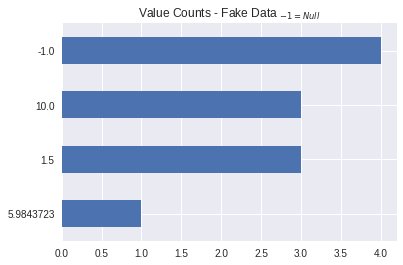

In [99]:
df.fillna(-1)[0].\
    value_counts().\
    sort_values().\
    plot(                 
        kind="barh", 
        title="Value Counts - Fake Data $_{-1 = Null}$"
    )

### A more real looking dataset 


* **age** – The age of the individual
* **type_employer** – The type of employer the individual has. Whether they are government, military, private, an d so on.
* **fnlwgt** – The \# of people the census takers believe that observation represents. We will be ignoring this variable
* **education** – The highest level of education achieved for that individual
* **education_num** – Highest level of education in numerical form
* **marital** – Marital status of the individual
* **occupation** – The occupation of the individual
* **relationship** – A bit more difficult to explain. Contains family relationship values like husband, father, etc.
* **race** – descriptions of the individuals race. Black, White, Eskimo, and so on
* **sex** – Biological Sex
* **capital_gain** – Capital gains recorded
* **capital_loss** – Capital Losses recorded
* **hr_per_week** – Hours worked per week
* **country** – Country of origin for person
* **income** / target – Boolean Variable. Whether or not the person makes more than \$50,000 per annum income.

> Data dictionary is approximate

In [18]:
df = pd.read_csv("./data/train.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         30725 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education.num     32561 non-null int64
marital.status    32561 non-null object
occupation        30718 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital.gain      32561 non-null int64
capital.loss      32561 non-null int64
hours.per.week    32561 non-null int64
native.country    31978 non-null object
target            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


### Check Top Missing Variables

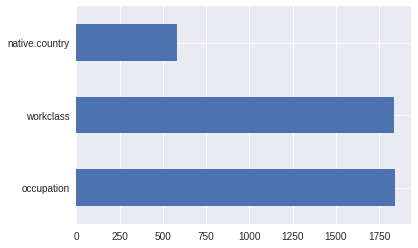

In [20]:
df.isnull().sum().nlargest(3).plot(kind="barh")


### Let's tackle the biggest problem first _"occupation"_
The `dtype` looks like it's a string.  Ok, then how many different _occupations_ are there?

In [21]:
df['occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

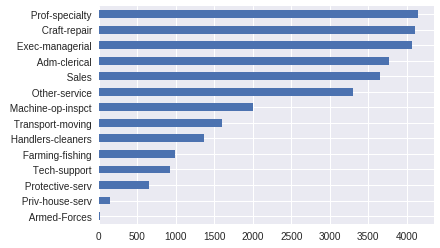

In [22]:
df['occupation'].value_counts().sort_values().plot(kind="barh")

## Imputation should be the priority with missing values

There are a few ways to deal with missing values (ie: Null) within the scope of a variable.

1. Pick a random value.
1. Pick a central value.
1. Backfill or frontfill.
1. Use a predictive model to predict the missing values (KNN tends to work well, depending on your data).

### Imputation is straight forward with `fillna()`
We might not want everyone to be rocket scientists.  You can also use `inplace=True` to update your dataframe (FYI).

In [23]:
df['occupation'].fillna('Rocket-scientist').value_counts(ascending=True)

 Armed-Forces            9
 Priv-house-serv       149
 Protective-serv       649
 Tech-support          928
 Farming-fishing       994
 Handlers-cleaners    1370
 Transport-moving     1597
Rocket-scientist      1843
 Machine-op-inspct    2002
 Other-service        3295
 Sales                3650
 Adm-clerical         3770
 Exec-managerial      4066
 Craft-repair         4099
 Prof-specialty       4140
Name: occupation, dtype: int64

### Any problems with this approach?
Pause for effect.

### Perhaps a _______ value could help us here?

### We should investigate futher.

Let's examine what values other variables take on when _occupation_ is set.  If you recall "Prof-specialty" has the most values for occupation.  

> We could clean those occupation values because they have leading spaced (so annoying!).

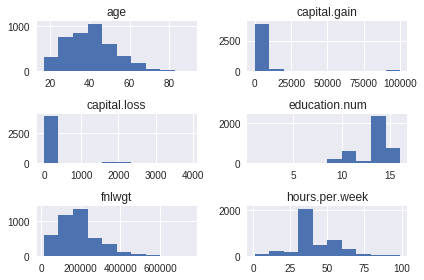

In [156]:
df.query("occupation == ' Prof-specialty'").hist()
plt.tight_layout()

/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


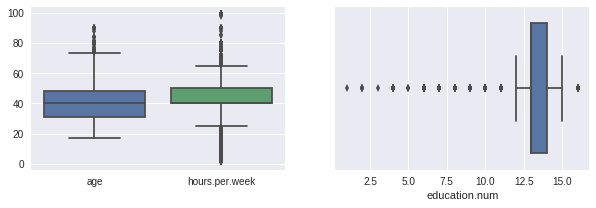

In [24]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))

columns = ['age', 'education', 'hours.per.week']
sns.boxplot(df.query("occupation == ' Prof-specialty'")[columns], ax=ax[0])
sns.boxplot(df.query("occupation == ' Prof-specialty'")['education.num'], ax=ax[1])

What's typical about 'Prof-specialty' is that they work about 40 hours a week, have over 10 education (years perhaps?), and look like they're middle aged or so?  We should check the viability of imputing the missing values for when these variables are seen with missing occupation.

In [25]:
about_40 = df['hours.per.week'].between(40, 50)
middle_aged = df['age'].between(35, 45)

df[(about_40) & (middle_aged)]['occupation'].value_counts()


 Craft-repair         1047
 Exec-managerial      1016
 Prof-specialty        947
 Adm-clerical          721
 Sales                 591
 Machine-op-inspct     495
 Other-service         392
 Transport-moving      340
 Tech-support          223
 Handlers-cleaners     214
 Farming-fishing       134
 Protective-serv       120
 Priv-house-serv         7
 Armed-Forces            1
Name: occupation, dtype: int64

### Looks like we've eliminated 3/4 of our "Prof-specialty" records!?

We have about 4100 or so "Prof-Specialty" in the total dataset.  If we where to take the mode of our subset when age is 35-45, and hours worked is between 40-50, the mode of occupation would be much different.  Is this a reliable statistic to impute with?  We're talking about 1843 / 32561 values (~5% of all values are only missing).  Does it really matter if we're this specific about which subset we borrow a statistic from to fill missing values?

In [188]:
df['occupation'].isnull().sum() / 32561

0.056601455729246644

### For our continious variables, these values are typical for different occupations. 

We will leave this here for future reference.

In [184]:
df.groupby("occupation").agg([np.mean, np.median])

age         fnlwgt         education.num         \
                         mean median    mean  median          mean median   
occupation                                                                  
 Adm-clerical       36.964456     35  192043  180340     10.113528     10   
 Armed-Forces       30.222222     29  215425  191073     10.111111      9   
 Craft-repair       39.031471     38  192132  180239      9.110759      9   
 Exec-managerial    42.169208     41  184414  174215     11.449090     12   
 Farming-fishing    41.211268     39  170190  157353      8.608652      9   
 Handlers-cleaners  32.165693     29  204391  189249      8.510219      9   
 Machine-op-inspct  37.715285     36  195040  183136      8.487512      9   
 Other-service      34.949621     32  188608  176452      8.779666      9   
 Priv-house-serv    41.724832     40  201107  193530      7.362416      9   
 Prof-specialty     40.517633     40  185296  176052     12.905072     13   
 Protective-serv    38.953775     36  202039  190350     10.184900     10   
 Sales              37.353973     35  190885  180992     10.299726     10   
 Tech-support       37.022629     36  192098  176761     10.992457     11   
 Transport-moving   40.197871     39  190366  180401      8.767063      9   

                   capital.gain        capital.loss        hours.per.week  \
                           mean median         mean median           mean   
occupation                                                                  
 Adm-clerical        495.954907      0    60.794430      0      37.558355   
 Armed-Forces          0.000000      0   209.666667      0      40.666667   
 Craft-repair        649.512808      0    88.465235      0      42.304221   
 Exec-managerial    2262.772996      0   138.838416      0      44.987703   
 Farming-fishing     589.726358      0    63.075453      0      46.989940   
 Handlers-cleaners   257.572993      0    45.635766      0      37.947445   
 Machine-op-inspct   328.689311      0    61.706294      0      40.755744   
 Other-service       191.301669      0    38.250683      0      34.701669   
 Priv-house-serv     279.852349      0    21.449664      0      32.885906   
 Prof-specialty     2726.699517      0   136.139372      0      42.386715   
 Protective-serv     708.098613      0    78.334361      0      42.870570   
 Sales              1319.829315      0    98.300548      0      40.781096   
 Tech-support        673.552802      0    98.665948      0      39.432112   
 Transport-moving    490.323732      0    81.480902      0      44.656230   

                           
                   median  
occupation                 
 Adm-clerical          40  
 Armed-Forces          40  
 Craft-repair          40  
 Exec-managerial       40  
 Farming-fishing       40  
 Handlers-cleaners     40  
 Machine-op-inspct     40  
 Other-service         40  
 Priv-house-serv       35  
 Prof-specialty        40  
 Protective-serv       40  
 Sales                 40  
 Tech-support          40  
 Transport-moving      40

### Our application is predicting salary above or below 50k salaries
There's probably some diff

Most people make less than 50k.  Our predictors will have the most influence over how these two categories, depending on our model.

In [191]:
df.groupby("target").size()

target
 <=50K    24720
 >50K      7841
dtype: int64

In [211]:
df[df['occupation'].isnull()].groupby(["target"]).size()

target
 <=50K    1652
 >50K      191
dtype: int64

In [197]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### For these occupation, we could impute based on the mode of education, and native country.


In [215]:
df.query("target == ' <=50K'").groupby(['occupation', 'education', 'native.country']).size().head(30)

occupation     education    native.country
 Adm-clerical   10th         Germany           1
                             Jamaica           1
                             Mexico            1
                             United-States    35
                11th         Canada            1
                             Germany           1
                             India             1
                             Mexico            1
                             South             1
                             United-States    59
                12th         Mexico            1
                             Portugal          1
                             Puerto-Rico       1
                             United-States    32
                5th-6th      El-Salvador       1
                             Mexico            4
                             United-States     1
                7th-8th      Cuba              1
                             Portugal          1
                          

In [11]:
X = np.array([[np.nan, np.nan, np.nan], ["poo", 'poo', 0]])
stats.mode(X, )

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:253: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


ModeResult(mode=array([['nan', 'nan', '0']], 
      dtype='<U32'), count=array([[1, 1, 1]]))

In [12]:
stats.mode(["test"])

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:253: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


ModeResult(mode=array(['test'], 
      dtype='<U4'), count=array([1]))

In [13]:
grouped_df = df.query("target == ' <=50K'").groupby(['education', 'native.country'])
imputed_occupation_groups = grouped_df['occupation'].apply(lambda x: stats.mode(x.astype("str"))[0][0])

UndefinedVariableError: name 'target' is not defined

In [326]:
imputed_occupation = imputed_occupation_groups.reset_index()
imputed_occupation['occupation'] = imputed_occupation['occupation'].map(lambda o: np.nan if o == "nan" else o)

### Looks like we can fix all but 14 based on the mode.
This is probably as good as it's going to get based on this assumption of education and country.  It's not perfect, but for %5 of our data, it's good enough, and better than imputing to the mode of entire occupation variable without these subsets.

In [358]:
imputed_occupation.head()

,education,native.country,occupation
0,10th,Canada,Other-service
1,10th,China,Craft-repair
2,10th,Columbia,Machine-op-inspct
3,10th,Cuba,NaN
4,10th,Dominican-Republic,Handlers-cleaners


In [331]:
imputed_occupation['occupation'].isnull().sum()

14

### Great but how do we set our original dataframe with these new modes?

We can use an apply function on our `imputed_occupation` dataframe, to refer to the subsets in our original dataframe, to set the null values in the cooresponding subsets modes.

>  One thing to be careful of is working on "slice of a copy" when setting a copy of a DataFrame.  This is why we should use .loc when setting values.

In [355]:
def set_occupation_modes(row):
    
    education_mask = (df['education'] == row['education'])
    country_mask   = (df['native.country'] == row['native.country'])
    
    # We select the education and country subsets, to set the missing values
    df.loc[(education_mask & country_mask), 'occupation'] = df[education_mask & country_mask]['occupation'].fillna(row['occupation'])
    
print("Imputation started...")
imputed_occupation.apply(set_occupation_modes, axis=1)
print("Imputation complete.")

Imputation started...
Imputation complete.


#### Woohoo we  fixed the majority of our _occupation_ records!

In [356]:
df['occupation'].isnull().sum()

69

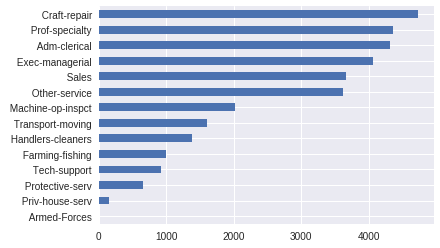

In [361]:
df['occupation'].value_counts().sort_values().plot(kind="barh")

### Let's use a predictive model to impute!
Simple KNN example, time permitting.

In [461]:
from sklearn.neighbors import KNeighborsClassifier

# Let's reload our data again.  Messing up occupation.
df = pd.read_csv("./data/train.csv")
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


#### There are some considerations we might take into account, but we will just implement vanilla KNN, then perhaps tune it later.
The implementation isn't really that bad, so let's try it out and compare it to our "mode" method.

In [462]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'target'],
      dtype='object')

### Create a cannonical list of occupations
We will need to be able to convert back and forth from this list.

In [476]:
occupations = df['occupation'].unique().tolist()
occupations.append(np.nan)
occupations

[' Adm-clerical',
 ' Exec-managerial',
 ' Handlers-cleaners',
 ' Prof-specialty',
 ' Other-service',
 ' Sales',
 ' Craft-repair',
 ' Transport-moving',
 ' Farming-fishing',
 ' Machine-op-inspct',
 ' Tech-support',
 nan,
 ' Protective-serv',
 ' Armed-Forces',
 ' Priv-house-serv',
 nan]

In [535]:
columns   = ['age', 'workclass', 'education', 'education.num', 'hours.per.week', 'native.country', 'target']
dummied   = pd.get_dummies(df[columns])

## Convert to numeric index, preserving our nulls
dummied['occupation'] = df['occupation'].map(lambda x: occupations.index(x) if type(x) != float else x)

In [554]:
only_predictors = list(set(dummied.columns) - set(["occupation"]))

y         = dummied[dummied['occupation'].notnull()]['occupation']
X         = dummied[dummied['occupation'].notnull()][only_predictors]
to_impute = dummied.loc[df['occupation'].isnull()][only_predictors]

### Basic KNN Model

The only thing we're not exploring is the possibility for cross-validation.  This is also a great idea.  You could split your data for validation if you use the known set of rows containing non-null "occupation" values.

In [555]:
knn = KNeighborsClassifier(n_neighbors=31, weights="distance")
model = knn.fit(X, y)

In [556]:
## Should always make sure your dimensions match up for training vs predicting (and/or testing)
# Most of this code I wrote to be boilerplate
X.shape, to_impute.shape

((30718, 70), (1843, 70))

#### `to_impute` is our slice of "null" occupations.
We add our predictions back to our original DataFrame, using the predict function.

In [557]:
to_impute['predicted_occupation'] = model.predict(to_impute)

### We can add our labels back from or occupation reference list

In [562]:
to_impute['predicted_labels'] = to_impute['predicted_occupation'].map(lambda p: occupations[int(p)])

In [564]:
to_impute.head()

,education_ Assoc-acdm,native.country_ Italy,education_ 10th,native.country_ Cambodia,education_ 11th,workclass_ Self-emp-not-inc,workclass_ Without-pay,native.country_ El-Salvador,native.country_ Jamaica,hours.per.week,...,native.country_ Ireland,native.country_ Poland,workclass_ Federal-gov,native.country_ Columbia,native.country_ Hong,native.country_ India,native.country_ Portugal,native.country_ England,predicted_occupation,predicted_labels
27,0,0,0,0,0,0,0,0,0,60,...,0,0,0,0,0,0,0,0,1.0,Exec-managerial
61,0,0,0,0,0,0,0,0,0,40,...,0,0,0,0,0,0,0,0,6.0,Craft-repair
69,0,0,0,0,0,0,0,0,0,40,...,0,0,0,0,0,0,0,0,0.0,Adm-clerical
77,0,0,1,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,1.0,Exec-managerial
106,0,0,1,0,0,0,0,0,0,32,...,0,0,0,0,0,0,0,0,5.0,Sales


### Let's impute our original DataFrame!

In [568]:
## Notice the missing occupations line up perfectly!
df.loc[to_impute.index].head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,target
27,54,NaN,180211,Some-college,10,Married-civ-spouse,NaN,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
61,32,NaN,293936,7th-8th,4,Married-spouse-absent,NaN,Not-in-family,White,Male,0,0,40,NaN,<=50K
69,25,NaN,200681,Some-college,10,Never-married,NaN,Own-child,White,Male,0,0,40,United-States,<=50K
77,67,NaN,212759,10th,6,Married-civ-spouse,NaN,Husband,White,Male,0,0,2,United-States,<=50K
106,17,NaN,304873,10th,6,Never-married,NaN,Own-child,White,Female,34095,0,32,United-States,<=50K


In [569]:
df.loc[to_impute.index, 'occupation'] = to_impute['predicted_labels']

In [573]:
df['occupation'].isnull().sum()

0

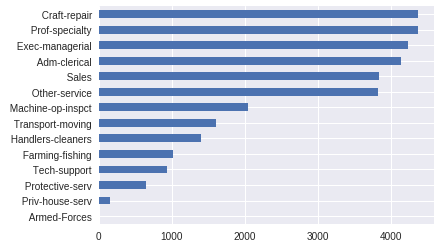

In [575]:
df['occupation'].value_counts().sort_values().plot(kind="barh")

### One more thing:  When CSV's don't import properly

This can be a real pain.  Let's, at least explore how to identify a simple problem that you might encounter.